<a href="https://colab.research.google.com/github/Sagar-Kamat/fashion-garment-recogniser/blob/main/FashionGarmentDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("drive/MyDrive/Fashion_MNIST")

### Importing libraries, dataset and preprocessing data

In [ ]:
# importing all libraries
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [ ]:
# Load training and test data into dataframes
data_train = pd.read_csv('fashion-mnist_train.csv')
data_test = pd.read_csv('fashion-mnist_test.csv')

In [ ]:
# X forms the training images, and y forms the training labels
X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

In [ ]:
# Here I split original training data to sub-training (80%) and validation data (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

In [ ]:
# X_test forms the test images, and y_test forms the test labels
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

In [ ]:
# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

In [ ]:
# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

In [ ]:
# Prepare the test images
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

In [ ]:
# Prepare the validation images
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255

### CNN model

In [ ]:
# Creating the CNN with 4 layers
cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(10, activation='softmax'))

In [ ]:
# compile the model
cnn4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
cnn4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        1

In [ ]:
# training the model
history4 = cnn4.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/10
188/188 [==============================] - 4s 19ms/step - loss: 0.7511 - accuracy: 0.7385 - val_loss: 2.8266 - val_accuracy: 0.1918
Epoch 2/10
188/188 [==============================] - 3s 18ms/step - loss: 0.4437 - accuracy: 0.8390 - val_loss: 1.9061 - val_accuracy: 0.5042
Epoch 3/10
188/188 [==============================] - 3s 17ms/step - loss: 0.3709 - accuracy: 0.8685 - val_loss: 0.3891 - val_accuracy: 0.8640
Epoch 4/10
188/188 [==============================] - 3s 17ms/step - loss: 0.3302 - accuracy: 0.8830 - val_loss: 0.2983 - val_accuracy: 0.8924
Epoch 5/10
188/188 [==============================] - 3s 17ms/step - loss: 0.3018 - accuracy: 0.8932 - val_loss: 0.2588 - val_accuracy: 0.9059
Epoch 6/10
188/188 [==============================] - 3s 17ms/step - loss: 0.2808 - accuracy: 0.9013 - val_loss: 0.2483 - val_accuracy: 0.9121
Epoch 7/10
188/188 [==============================] - 3s 17ms/step - loss: 0.2682 - accuracy: 0.9056 - val_loss: 0.2543 - val_accuracy: 0.9084

In [ ]:
# calculating test loss and test accuracy
score4 = cnn4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 0.24598293006420135
Test accuracy: 0.9117000102996826


### Augmenting data for better results

In [ ]:
# data augmentation
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=256)
val_batches = gen.flow(X_val, y_val, batch_size=256)

In [ ]:
# training the augmented data
history4 = cnn4.fit(batches, steps_per_epoch=48000//256, epochs=50,
                    validation_data=val_batches, validation_steps=12000//256)

Epoch 1/50
187/187 [==============================] - 16s 84ms/step - loss: 0.4076 - accuracy: 0.8535 - val_loss: 0.4141 - val_accuracy: 0.8526
Epoch 2/50
187/187 [==============================] - 15s 82ms/step - loss: 0.3637 - accuracy: 0.8691 - val_loss: 0.3300 - val_accuracy: 0.8809
Epoch 3/50
187/187 [==============================] - 16s 83ms/step - loss: 0.3424 - accuracy: 0.8762 - val_loss: 0.2984 - val_accuracy: 0.8882
Epoch 4/50
187/187 [==============================] - 15s 81ms/step - loss: 0.3310 - accuracy: 0.8785 - val_loss: 0.3099 - val_accuracy: 0.8853
Epoch 5/50
187/187 [==============================] - 15s 80ms/step - loss: 0.3217 - accuracy: 0.8835 - val_loss: 0.2941 - val_accuracy: 0.8893
Epoch 6/50
187/187 [==============================] - 15s 80ms/step - loss: 0.3165 - accuracy: 0.8848 - val_loss: 0.2700 - val_accuracy: 0.8988
Epoch 7/50
187/187 [==============================] - 15s 80ms/step - loss: 0.3073 - accuracy: 0.8882 - val_loss: 0.2750 - val_accuracy:

In [ ]:
# calculating test loss and test accuracy on augmented data
score4 = cnn4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 0.1735728532075882
Test accuracy: 0.9387000203132629


### Visualisation


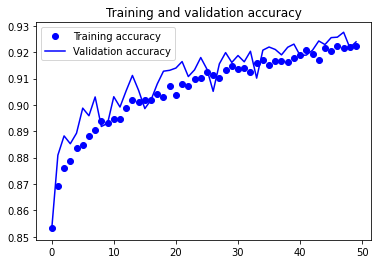

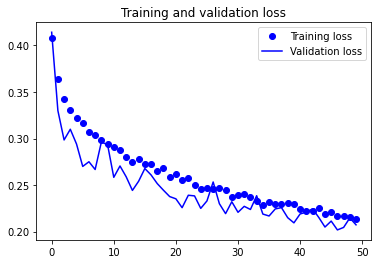

In [ ]:
# plot training and validation accuracy as well as training and validation loss.
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history4.history['accuracy']
val_accuracy = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()